In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
# 폰트 추가하기
font_dir = ['./fonts']
for font in mpl.font_manager.findSystemFonts(fontpaths=font_dir):
    print(mpl.font_manager.FontProperties(fname=font).get_name())
    mpl.font_manager.fontManager.addfont(font)

Nanum Pen Script
D2Coding ligature
NanumSquare Neo Heavy
NanumMyeongjoOTF
NanumGothic
NanumBarunpenOTF
NanumGothicOTF Eco
NanumSquare
NanumGothic
NanumSquare Neo OTF ExtraBold
NanumMyeongjoOTF Eco
NanumSquareRoundOTF
NanumBarunGothic YetHangul
NanumGothic
NanumSquare
NanumGothic
NanumMyeongjoOTF Eco
NanumBarunGothicOTF
NanumBarunGothic
NanumSquare Neo ExtraBold
NanumSquare Neo Regular
NanumGothic
NanumSquare Neo Light
NanumSquare_ac
NanumSquareRound
NanumBarunGothic
NanumSquare Neo OTF Regular
NanumMyeongjo YetHangul
NanumBarunGothic
NanumMyeongjo Eco
NanumSquareOTF
NanumGothicOTF Eco
NanumGothic Eco
NanumMyeongjoOTF
NanumBarunpen
NanumGothic Eco
NanumMyeongjoOTF Eco
NanumBarunGothic
NanumSquare Neo Bold
NanumSquareOTF
NanumSquareOTF_ac
NanumSquare
NanumMyeongjo Eco
NanumGothicOTF
D2Coding ligature
NanumSquareOTF_ac
NanumSquareRoundOTF
Nanum Pen Script OTF
NanumSquareRound
NanumBarunpenOTF
NanumMyeongjoOTF YetHangul
NanumSquare_ac
NanumSquare Neo OTF Heavy
NanumBarunpen
NanumMyeongjo
N

In [3]:
# font family 지정하기 # 전체 범위에 적용
mpl.rcParams['font.family'] = 'NanumGothic'
print(mpl.rcParams['font.family'])

['NanumGothic']


In [4]:
# 유니코드에서 음수 부호 설정
mpl.rc('axes', unicode_minus=False)

In [5]:
# 주피터 내부에 그림 표시하기
%matplotlib inline

### 데이터 전처리

In [6]:
# 성별, 연령별 서울지역 방문자수 9개구 
paths = os.listdir('datas/mini_project/방문자수')
paths

['서울 강남구',
 '서울 강서구',
 '서울 구로구',
 '서울 도봉구',
 '서울 마포구',
 '서울 성동구',
 '서울 양천구',
 '서울 은평구',
 '서울 중랑구']

In [7]:
file_paths = {path: os.listdir('datas/mini_project/방문자수/'+path) for path in paths} #파일 경로를 딕셔너리로 저장
file_paths

{'서울 강남구': ['강남구10월_방문자 성연령별 분포.csv',
  '강남구11월_방문자 성연령별 분포.csv',
  '강남구12월_방문자 성연령별 분포.csv',
  '강남구1월_방문자 성연령별 분포.csv',
  '강남구2월_방문자 성연령별 분포.csv',
  '강남구3월_방문자 성연령별 분포.csv',
  '강남구4월_방문자 성연령별 분포.csv',
  '강남구5월_방문자 성연령별 분포.csv',
  '강남구6월_방문자 성연령별 분포.csv',
  '강남구7월_방문자 성연령별 분포.csv',
  '강남구8월_방문자 성연령별 분포.csv',
  '강남구9월_방문자 성연령별 분포.csv'],
 '서울 강서구': ['강서구10월_방문자 성연령별 분포.csv',
  '강서구11월_방문자 성연령별 분포.csv',
  '강서구12월_방문자 성연령별 분포.csv',
  '강서구1월_방문자 성연령별 분포.csv',
  '강서구2월_방문자 성연령별 분포.csv',
  '강서구3월_방문자 성연령별 분포.csv',
  '강서구4월_방문자 성연령별 분포.csv',
  '강서구5월_방문자 성연령별 분포.csv',
  '강서구6월_방문자 성연령별 분포.csv',
  '강서구7월_방문자 성연령별 분포.csv',
  '강서구8월_방문자 성연령별 분포.csv',
  '강서구9월_방문자 성연령별 분포.csv'],
 '서울 구로구': ['구로구10월_방문자 성연령별 분포.csv',
  '구로구11월_방문자 성연령별 분포.csv',
  '구로구12월_방문자 성연령별 분포.csv',
  '구로구1월_방문자 성연령별 분포.csv',
  '구로구2월_방문자 성연령별 분포.csv',
  '구로구3월_방문자 성연령별 분포.csv',
  '구로구4월_방문자 성연령별 분포.csv',
  '구로구5월_방문자 성연령별 분포.csv',
  '구로구6월_방문자 성연령별 분포.csv',
  '구로구7월_방문자 성연령별 분포.csv',
  '구로구8월_방문자 성연령별 분포.csv',
  '구로구9월_방문자 성

In [8]:
#각 데이터의 위치 저장하기
total_paths = [] 
for key, values in file_paths.items():
    for value in values:
        total_paths.append(f'datas/mini_project/방문자수/{key}/{value}')

In [9]:
result = [] # 데이터 프레임 넣을 리스트 생성
for path in total_paths:
    # csv 읽어오기
    data = pd.read_csv(path, encoding='CP949')
    # 주소의 4번째에 있는 값 '지역'으로 받아오기
    data["지역"] = path.split('/')[3]
    # 주소 5번째 값에서 월 값만 가져오기
    data["기준 월"] = "".join(list(path.split('/')[4])[3:-16]) 
    # 리스트에 데이터 넣기
    result.append(data)
# concat 사용해 리스트에 넣은 데이터프레임 합치기
visit = pd.concat(result, ignore_index=True)
# 전체 데이터 확인
pd.set_option("display.max_rows", 768)

In [10]:
# 만든 데이터 프레임 csv로 내보내기
visit.to_csv(path_or_buf='datas/mini_project/visitor1.csv', encoding='CP949')

In [11]:
# 업종별 서울지역 관광소비 
path = 'datas/mini_project/관광소비'
files = os.listdir(path) # 파일 이름 가져오기

In [12]:
# 데이터 프레임 넣을 리스트 생성
result = []
for file in files:
    # csv 읽어오기 
    data = pd.read_csv(path + '/' + file, encoding='CP949')     
    # 지역 열 추가
    data["지역"] = file.split('_')[0]
    result.append(data)
# 데이터프레임으로 합치기
consume_df = pd.concat(result, ignore_index=True)
# 기준연월 -> 기준 월로 단위 변경하기
consume_df["기준 월"] = consume_df["기준연월"]-202200
consume_df.drop("기준연월", axis=1, inplace=True)

In [13]:
# 관광소비 월별로 정렬하기
consume_sort = consume_df.sort_values(by=["기준 월", "지역"], ascending=[True, True])
consume_sort

,업종대분류명,소비액(천원),지역,기준 월
0,숙박업,6055241.0,강남구,1
1,여행업,251156.0,강남구,1
2,운송업,16142805.0,강남구,1
3,쇼핑업,43476340.0,강남구,1
4,여가서비스업,4224849.0,강남구,1
...,...,...,...,...
2030,여가서비스업,361043.0,중랑구,12
2031,식음료업,7929399.0,중랑구,12
2038,여행업,0.0,중랑구,12
2039,운송업,1987.0,중랑구,12


In [14]:
# groupby를 이용해 업종대분류명, 기준연월로 묶어 합계 구하기
consume_sum = consume_sort.groupby(["업종대분류명", "기준 월"]).sum(numeric_only=True)

# 소비액 단위를 1억원으로 바꾸기
consume_sum_food = consume_sum.loc[('식음료업',  slice(None))]/100000
consume_sum_shop = consume_sum.loc[('쇼핑업',  slice(None))]/100000
consume_sum_full = consume_sum.loc[('전체',  slice(None))]/100000

In [15]:
# 내국인의 2018~2022 관광소비 추이 데이터
consume_year = pd.read_csv("datas/mini_project/20230320161925_관광소비 추이_내국인.csv", encoding="CP949")
# groupby를 이용해 업종대분류명, 기준연월로 묶어 합계 구하기
consume_year = consume_year.groupby(["업종대분류명", "기준연월"]).sum()
consume_year

소비액(천원)
업종대분류명 기준연월              
쇼핑업    2018  3.610945e+09
       2019  3.491885e+09
       2020  2.913612e+09
       2021  3.144466e+09
       2022  3.863920e+09
숙박업    2018  4.263807e+08
       2019  4.319756e+08
       2020  2.977657e+08
       2021  3.233193e+08
       2022  4.393830e+08
식음료업   2018  6.998712e+09
       2019  7.067661e+09
       2020  5.448564e+09
       2021  5.005890e+09
       2022  6.323585e+09
여가서비스업 2018  5.323239e+08
       2019  5.389030e+08
       2020  2.515767e+08
       2021  2.922874e+08
       2022  4.446434e+08
여행업    2018  1.994215e+08
       2019  1.714448e+08
       2020  2.993783e+07
       2021  1.474102e+07
       2022  3.638882e+07
운송업    2018  1.048108e+09
       2019  9.500090e+08
       2020  3.542267e+08
       2021  3.643337e+08
       2022  8.351014e+08
전체     2018  7.609007e+09
       2019  7.470276e+09
       2020  5.100511e+09
       2021  4.845965e+09
       2022  6.762397e+09

In [16]:
# 소비액 단위를 10억원으로 바꾸기
consume_year_food = consume_year.loc[("식음료업", slice(None))]/1000000
consume_year_full = consume_year.loc[("전체", slice(None))]/1000000
consume_year_shop = consume_year.loc[("쇼핑업", slice(None))]/1000000

In [17]:
# 외국인의 2018~2022 관광소비 추이 데이터
consume_foreign = pd.read_csv("datas/mini_project/20230320161925_관광소비 추이_외국인.csv", encoding="CP949")
# groupby를 이용해 업종대분류명, 기준연월로 묶어 합계 구하기
consume_foreign = consume_foreign.groupby(["업종대분류명", "기준연월"]).sum()
consume_foreign

소비액(천원)
업종대분류명 기준연월              
쇼핑업    2018  1.624479e+09
       2019  1.694789e+09
       2020  2.858271e+08
       2021  1.792911e+08
       2022  6.106750e+08
숙박업    2018  7.808931e+08
       2019  8.784896e+08
       2020  1.227789e+08
       2021  8.522391e+07
       2022  4.216720e+08
식음료업   2018  3.882077e+08
       2019  4.387594e+08
       2020  1.216930e+08
       2021  9.732068e+07
       2022  3.071999e+08
여가서비스업 2018  2.445340e+08
       2019  3.135874e+08
       2020  6.680313e+07
       2021  2.217739e+07
       2022  1.364052e+08
여행업    2018  8.813594e+06
       2019  7.222805e+06
       2020  6.905046e+06
       2021  7.057480e+05
       2022  3.273881e+06
운송업    2018  2.903590e+07
       2019  1.959289e+07
       2020  5.899440e+06
       2021  4.054109e+06
       2022  1.043668e+07

In [18]:
# 소비액 단위를 10억원으로 바꾸기
# 업종에 전체가 존재하지 않으므로 전체는 기준연월을 기준으로 groupby하여 합계를 구하기
consume_foreign_full = consume_foreign.groupby(["기준연월"]).sum()/1000000
consume_foreign_food = consume_foreign.loc[("식음료업", slice(None))]/1000000
consume_foreign_hotel = consume_foreign.loc[("숙박업", slice(None))]/1000000
consume_foreign_shop = consume_foreign.loc[("쇼핑업", slice(None))]/1000000
consume_foreign_active = consume_foreign.loc[("여가서비스업", slice(None))]/1000000

### 그래프 만들기

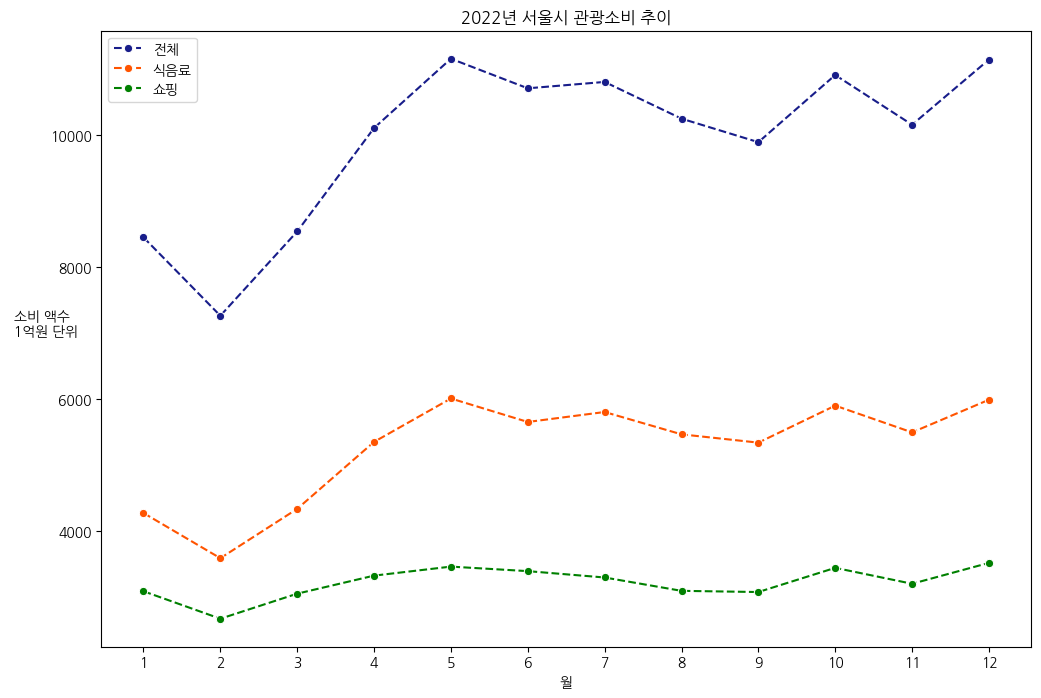

In [19]:
# 2022 서울시 관광소비 추이 그래프
plt.figure(figsize=(12, 8)) #그래프 그릴 figure 사이즈 설정
sns.lineplot(x=consume_sum_full.index, y=consume_sum_full["소비액(천원)"], color='#181D8A', linestyle='--', marker='o', label="전체")
sns.lineplot(x=consume_sum_food.index, y=consume_sum_food["소비액(천원)"], color='#FF5400', linestyle='--', marker='o', label="식음료")
sns.lineplot(x=consume_sum_shop.index, y=consume_sum_shop["소비액(천원)"], color='g', linestyle='--', marker='o', label="쇼핑")

plt.title("2022년 서울시 관광소비 추이")
# rotation = 글자를 돌릴 각도
plt.ylabel("소비 액수 \n 1억원 단위", rotation=0)
plt.xlabel("월")
# x축 구간 설정
plt.xticks(np.arange(1,13))
# savefig와 show를 함께 쓸 수 없음.
# plt.show() 
plt.savefig("datas/mini_project/소비추이fin") 

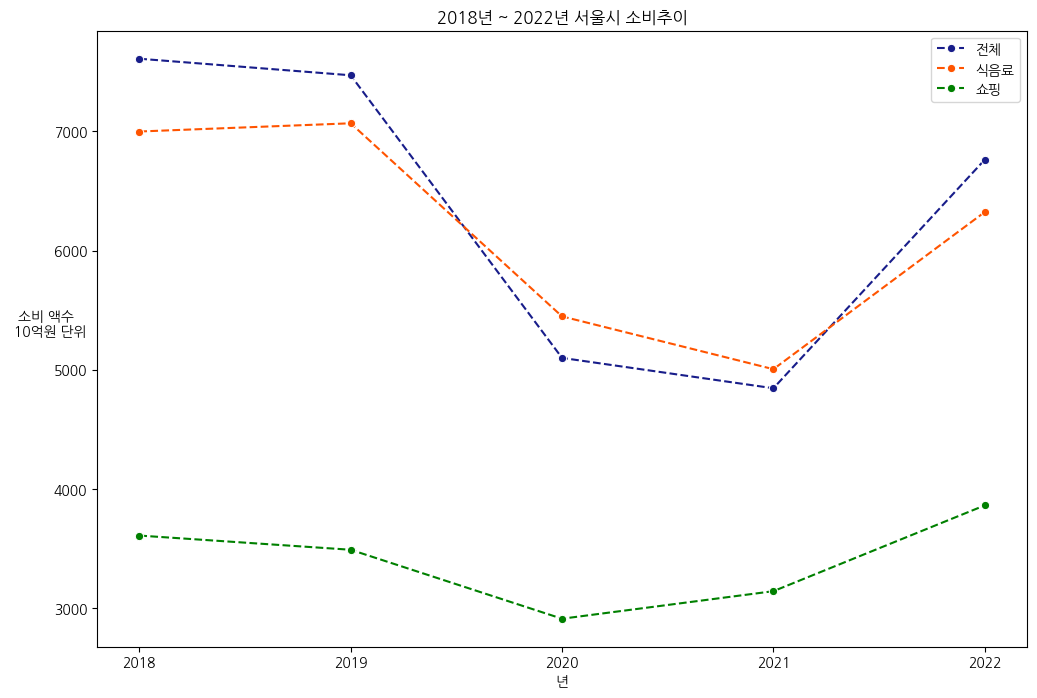

In [20]:
# 2018~2022 내국인 관광소비 추이 그래프 
plt.figure(figsize=(12, 8))
sns.lineplot(x=consume_year_full.index, y=consume_year_full["소비액(천원)"], color='#181D8A', linestyle='--', marker='o', label="전체")
sns.lineplot(x=consume_year_food.index, y=consume_year_food["소비액(천원)"], color='#FF5400', linestyle='--', marker='o', label="식음료")
sns.lineplot(x=consume_year_shop.index, y=consume_year_shop["소비액(천원)"], color='g', linestyle='--', marker='o', label="쇼핑")

plt.title("2018년 ~ 2022년 서울시 소비추이")
plt.ylabel("소비 액수 \n 10억원 단위", rotation=0)
plt.xlabel("년")
plt.xticks(np.arange(2018,2023))
plt.yticks()
# savefig와 show를 함께 쓸 수 없음.
# plt.show() 
plt.savefig("datas/mini_project/소비추이year") 

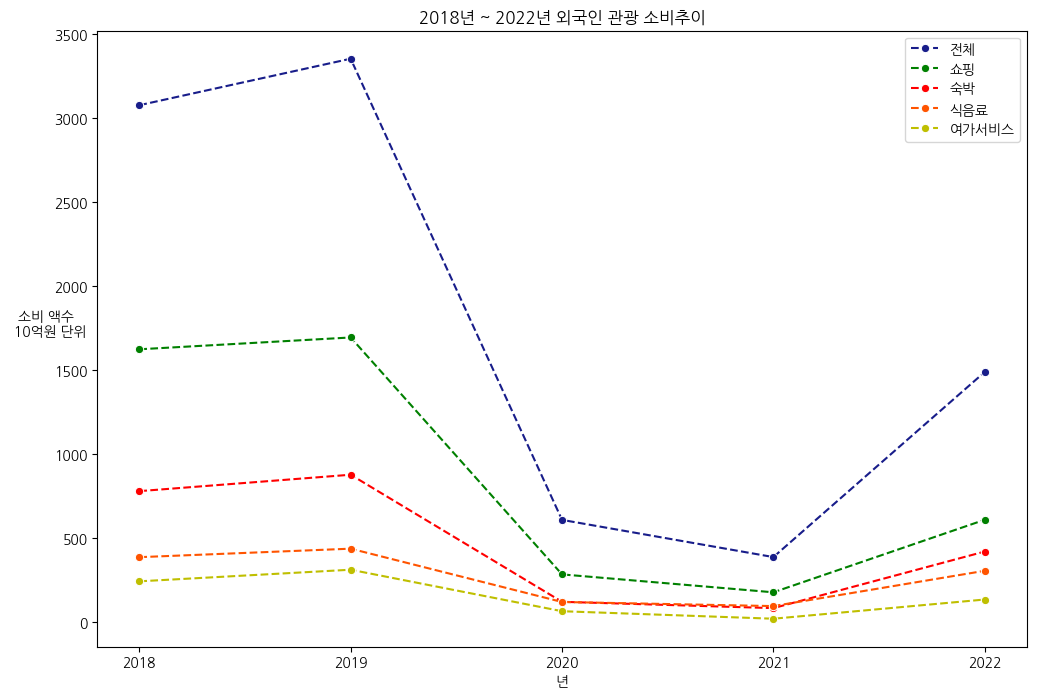

In [21]:
# 2018~2022 외국인 관광소비 추이 그래프 
plt.figure(figsize=(12, 8))
sns.lineplot(x=consume_foreign_full.index, y=consume_foreign_full["소비액(천원)"], color='#181D8A', linestyle='--', marker='o', label="전체")
sns.lineplot(x=consume_foreign_shop.index, y=consume_foreign_shop["소비액(천원)"], color='g', linestyle='--', marker='o', label="쇼핑")
sns.lineplot(x=consume_foreign_hotel.index, y=consume_foreign_hotel["소비액(천원)"], color='r', linestyle='--', marker='o', label="숙박")
sns.lineplot(x=consume_foreign_food.index, y=consume_foreign_food["소비액(천원)"], color='#FF5400', linestyle='--', marker='o', label="식음료")
sns.lineplot(x=consume_foreign_active.index, y=consume_foreign_active["소비액(천원)"], color='y', linestyle='--', marker='o', label="여가서비스")


plt.title("2018년 ~ 2022년 외국인 관광 소비추이")
plt.ylabel("소비 액수 \n 10억원 단위", rotation=0)
plt.xlabel("년")
# x축 구간 지정
plt.xticks(np.arange(2018,2023))
plt.yticks()
# savefig와 show를 함께 쓸 수 없음.
# plt.show() 
plt.savefig("datas/mini_project/소비추이foreign") 

## 데이터 전처리

In [76]:
paths = os.listdir("datas/Mini Projfect/Mini Project(CSV)")

['서울 강동구',
 '서울 관악구',
 '서울 금천구',
 '서울 동대문구',
 '서울 서대문구',
 '서울 성북구',
 '서울 영등포구',
 '서울 종로구']

In [78]:
file_paths = {path: os.listdir('datas/Mini Projfect/Mini Project(CSV)/'+path) for path in paths} #파일 경로를 딕셔너리로 저장
file_paths

{'서울 강동구': ['2022 1월 강동구 방문자 성연령별 분포.csv',
  '2022 2월 강동구 방문자 성연령별 분포.csv',
  '2022 3월 강동구 방문자 성연령별 분포.csv',
  '2022 4월 강동구 방문자 성연령별 분포.csv',
  '2022 5월 강동구 방문자 성연령별 분포.csv',
  '2022 6월 강동구 방문자 성연령별 분포.csv',
  '2022 7월 강동구 방문자 성연령별 분포.csv',
  '2022 8월 강동구 방문자 성연령별 분포.csv',
  '2022년 10월 강동구 방문자 성연령별 분포.csv',
  '2022년 11월 강동구 방문자 성연령별 분포.csv',
  '2022년 12월 강동구 방문자 성연령별 분포.csv',
  '2022년 9월 강동구 방문자 성연령별 분포.csv'],
 '서울 관악구': ['2022년 10월 관악구 방문자 성연령별 분포.csv',
  '2022년 11월 관악구 방문자 성연령별 분포.csv',
  '2022년 12월 관악구 방문자 성연령별 분포.csv',
  '2022년 1월 관악구 방문자 성연령별 분포.csv',
  '2022년 2월 관악구 방문자 성연령별 분포.csv',
  '2022년 3월 관악구 방문자 성연령별 분포.csv',
  '2022년 4월 관악구 방문자 성연령별 분포.csv',
  '2022년 5월 관악구 방문자 성연령별 분포.csv',
  '2022년 6월 관악구 방문자 성연령별 분포.csv',
  '2022년 7월 관악구 방문자 성연령별 분포.csv',
  '2022년 8월 관악구 방문자 성연령별 분포.csv',
  '2022년 9월 관악구 방문자 성연령별 분포.csv'],
 '서울 금천구': ['2022년 10월 금천구 방문자 성연령별 분포.csv',
  '2022년 11월 금천구 방문자 성연령별 분포.csv',
  '2022년 12월 금천구 방문자 성연령별 분포.csv',
  '2022년 1월 금천구 방문자 성연령별 분포.csv',
  '2022년 2월 금천구

In [79]:
total_paths = []
for key, values in file_paths.items():
    for value in values:
        total_paths.append(f'datas/Mini Projfect/Mini Project(CSV)/{key}/{value}')
result = []
for path in total_paths:
    data = pd.read_csv(path, encoding='CP949')
    data["지역"] = path.split('/')[2]
    data["기준연월"] = "년 ".join(path.split('/')[3].split()[:2])
    result.append(data)
msg = pd.concat(result, ignore_index=True)
pd.set_option("display.max_rows", 768)
msg.to_csv("datas/Mini Projfect/visitor2.csv")

# 데이터 전처리

In [22]:
# 사용할 라이브러리 import

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

In [23]:
# Add every font at the specified location
# 폰트 설정
font_dir = ['./fonts']
for font in mpl.font_manager.findSystemFonts(fontpaths=font_dir):
    print(mpl.font_manager.FontProperties(fname=font).get_name())
    mpl.font_manager.fontManager.addfont(font)

Nanum Pen Script
D2Coding ligature
NanumSquare Neo Heavy
NanumMyeongjoOTF
NanumGothic
NanumBarunpenOTF
NanumGothicOTF Eco
NanumSquare
NanumGothic
NanumSquare Neo OTF ExtraBold
NanumMyeongjoOTF Eco
NanumSquareRoundOTF
NanumBarunGothic YetHangul
NanumGothic
NanumSquare
NanumGothic
NanumMyeongjoOTF Eco
NanumBarunGothicOTF
NanumBarunGothic
NanumSquare Neo ExtraBold
NanumSquare Neo Regular
NanumGothic
NanumSquare Neo Light
NanumSquare_ac
NanumSquareRound
NanumBarunGothic
NanumSquare Neo OTF Regular
NanumMyeongjo YetHangul
NanumBarunGothic
NanumMyeongjo Eco
NanumSquareOTF
NanumGothicOTF Eco
NanumGothic Eco
NanumMyeongjoOTF
NanumBarunpen
NanumGothic Eco
NanumMyeongjoOTF Eco
NanumBarunGothic
NanumSquare Neo Bold
NanumSquareOTF
NanumSquareOTF_ac
NanumSquare
NanumMyeongjo Eco
NanumGothicOTF
D2Coding ligature
NanumSquareOTF_ac
NanumSquareRoundOTF
Nanum Pen Script OTF
NanumSquareRound
NanumBarunpenOTF
NanumMyeongjoOTF YetHangul
NanumSquare_ac
NanumSquare Neo OTF Heavy
NanumBarunpen
NanumMyeongjo
N

In [24]:
# 매직 매서드
# 시각화가 되지 않을 수 있는 부분을 되게끔 만드는(?) 메서드 
%matplotlib inline

In [25]:
mpl.rcParams['font.family'] = 'NanumSquareRound'
print(mpl.rcParams['font.family'])

['NanumSquareRound']


In [26]:
# os 라이브러리를 사용하여 여러 csv파일 한 번에 불러오기

import os

In [28]:
# os.listdir() 메서드는 지정한 디렉토리 내의 모든 파일과 디렉토리의 리스트를 리턴하는 메서드이다.
# 프로젝트의 원본 csv 파일들을 paths라는 변수에 리턴 
paths = os.listdir("datas/mini_project_datas/raw_csv")

In [29]:
# file_paths라는 변수를 지정
# paths 변수(지정된 경로안에 있는 폴더)에 담긴 폴더를 반복문(for)으로 돌린 뒤 dictionary 자료형으로 새로운 변수에 지정
file_paths = {path: os.listdir("datas/mini_project_datas/raw_csv/"+path) for path in paths}
file_paths

{'서울 강북구': ['강북구_202201-202201_방문자 성연령별 분포.csv',
  '강북구_202202-202202_방문자 성연령별 분포.csv',
  '강북구_202203-202203_방문자 성연령별 분포.csv',
  '강북구_202204-202204_방문자 성연령별 분포.csv',
  '강북구_202205-202205_방문자 성연령별 분포.csv',
  '강북구_202206-202206_방문자 성연령별 분포.csv',
  '강북구_202207-202207_방문자 성연령별 분포.csv',
  '강북구_202208-202208_방문자 성연령별 분포.csv',
  '강북구_202209-202209_방문자 성연령별 분포.csv',
  '강북구_202210-202210_방문자 성연령별 분포.csv',
  '강북구_202211-202211_방문자 성연령별 분포.csv',
  '강북구_202212-202212_방문자 성연령별 분포.csv'],
 '서울 광진구': ['광진구_202201-202201_방문자 성연령별 분포.csv',
  '광진구_202202-202202_방문자 성연령별 분포.csv',
  '광진구_202203-202203_방문자 성연령별 분포.csv',
  '광진구_202204-202204_방문자 성연령별 분포.csv',
  '광진구_202205-202205_방문자 성연령별 분포.csv',
  '광진구_202206-202206_방문자 성연령별 분포.csv',
  '광진구_202207-202207_방문자 성연령별 분포.csv',
  '광진구_202208-202208_방문자 성연령별 분포.csv',
  '광진구_202209-202209_방문자 성연령별 분포.csv',
  '광진구_202210-202210_방문자 성연령별 분포.csv',
  '광진구_202211-202211_방문자 성연령별 분포.csv',
  '광진구_202212-202212_방문자 성연령별 분포.csv'],
 '서울 노원구': ['노원구_202201-202201_방문자 성연령별 분포

In [30]:
# file_paths의 key, value 값을 기존 파일 경로에 합쳐주고
# 반복문(for)을 돌려 total_paths에 전체 경로를 리스트 형태로 지정
total_paths = []
for key, values in file_paths.items():
    for value in values:
        total_paths.append(f'datas/mini_project_datas/raw_csv/{key}/{value}')

In [31]:
# 데이터프레임에 지역과 기준월 컬럼을 추가하기위해 가져온 파일명에서 정보 파싱
result = []
for path in total_paths:
    data = pd.read_csv(path, encoding='CP949')
    data["지역"] = path.split('/')[3]
    data["기준 월"] = str(int("".join(path.split('/')[4].split('_')[1][4:6])))+"월"
    result.append(data)

msg = pd.concat(result, ignore_index=True)

In [32]:
msg

,방문자 연령,방문자 수(남성),방문자 비율(남성),방문자 수(여성),방문자 비율(여성),지역,기준 월
0,70세 이상,88619.0,3.7,83576.0,3.5,서울 강북구,1월
1,60~69세,205427.0,8.7,158456.0,6.7,서울 강북구,1월
2,50~59세,249668.0,10.5,202624.0,8.6,서울 강북구,1월
3,40~49세,227039.0,9.6,155842.0,6.6,서울 강북구,1월
4,30~39세,217053.0,9.2,159881.0,6.7,서울 강북구,1월
5,20~29세,240739.0,10.2,241175.0,10.2,서울 강북구,1월
6,10~19세,60634.0,2.6,57266.0,2.4,서울 강북구,1월
7,0~9세,8484.0,0.4,12135.0,0.5,서울 강북구,1월
8,70세 이상,74459.0,3.5,77608.0,3.7,서울 강북구,2월
9,60~69세,177346.0,8.4,139122.0,6.6,서울 강북구,2월


In [33]:
# 작업 파일 csv로 추출
msg.to_csv("datas/mini_project_datas/visitor_total/visitor3.csv")

### > 주현, 유단, 승현 3명이 작업한 visitor1, visitor2, visitor3 파일 합치기

In [34]:
# 계속 실행 시 기존의 visitor_total.csv에 같은 데이터 계속 합쳐짐(기존 파일 삭제 후 추출)
from glob import glob

file_name = glob("datas/mini_project_datas/visitor_total/*.csv")
total = pd.DataFrame()
for file_name in file_name:
    temp = pd.read_csv(file_name, sep=",")
    total = pd.concat([total, temp])
total.to_csv("datas/mini_project_datas/visitor_total/visitor_total.csv") 

In [35]:
total

,Unnamed: 0,방문자 연령,방문자 수(남성),방문자 비율(남성),방문자 수(여성),방문자 비율(여성),지역,기준 월,연령별 총합,Unnamed: 0.1,Unnamed: 0.2
0,0.0,70세 이상,520213.0,2.8,412070.0,2.2,서울 강남구,10월,932283.0,NaN,NaN
1,1.0,60~69세,1371827.0,7.3,941308.0,5.0,서울 강남구,10월,2313135.0,NaN,NaN
2,2.0,50~59세,1864349.0,9.9,1215964.0,6.4,서울 강남구,10월,3080313.0,NaN,NaN
3,3.0,40~49세,2104808.0,11.2,1228657.0,6.5,서울 강남구,10월,3333465.0,NaN,NaN
4,4.0,30~39세,2419316.0,12.8,1877997.0,10.0,서울 강남구,10월,4297313.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2395,763.0,40~49세,1224312.0,10.0,847940.0,6.9,서울 중구,12월,NaN,NaN,763.0
2396,764.0,30~39세,1393434.0,11.4,1241104.0,10.2,서울 중구,12월,NaN,NaN,764.0
2397,765.0,20~29세,1203932.0,9.9,1734608.0,14.2,서울 중구,12월,NaN,NaN,765.0
2398,766.0,10~19세,175873.0,1.4,244621.0,2.0,서울 중구,12월,NaN,NaN,766.0


In [36]:
# 추출 시 발생한 불필요한 컬럼 삭제
total.drop(["Unnamed: 0.1", "Unnamed: 0"], axis=1, inplace=True)

In [37]:
# 총 방문자 수를 구하기 위해 남성방문자 수 여성 방문자 수 별도의 데이터프레임화
MF_total = total[["방문자 수(남성)", "방문자 수(여성)"]]
MF_total

,방문자 수(남성),방문자 수(여성)
0,520213.0,412070.0
1,1371827.0,941308.0
2,1864349.0,1215964.0
3,2104808.0,1228657.0
4,2419316.0,1877997.0
...,...,...
2395,1224312.0,847940.0
2396,1393434.0,1241104.0
2397,1203932.0,1734608.0
2398,175873.0,244621.0


In [38]:
# 총 방문자 수를 구하기 위해 행간 합구하기
visitor_total = MF_total.sum(axis="columns")
visitor_total

0        932283.0
1       2313135.0
2       3080313.0
3       3333465.0
4       4297313.0
          ...    
2395    2072252.0
2396    2634538.0
2397    2938540.0
2398     420494.0
2399      28049.0
Length: 7200, dtype: float64

In [39]:
# 행간 합 결과를 기존의 데이터프레임 열에 추가
total["연령별 총합"] = visitor_total
total

,방문자 연령,방문자 수(남성),방문자 비율(남성),방문자 수(여성),방문자 비율(여성),지역,기준 월,연령별 총합,Unnamed: 0.2
0,70세 이상,520213.0,2.8,412070.0,2.2,서울 강남구,10월,932283.0,NaN
1,60~69세,1371827.0,7.3,941308.0,5.0,서울 강남구,10월,2313135.0,NaN
2,50~59세,1864349.0,9.9,1215964.0,6.4,서울 강남구,10월,3080313.0,NaN
3,40~49세,2104808.0,11.2,1228657.0,6.5,서울 강남구,10월,3333465.0,NaN
4,30~39세,2419316.0,12.8,1877997.0,10.0,서울 강남구,10월,4297313.0,NaN
...,...,...,...,...,...,...,...,...,...
2395,40~49세,1224312.0,10.0,847940.0,6.9,서울 중구,12월,2072252.0,763.0
2396,30~39세,1393434.0,11.4,1241104.0,10.2,서울 중구,12월,2634538.0,764.0
2397,20~29세,1203932.0,9.9,1734608.0,14.2,서울 중구,12월,2938540.0,765.0
2398,10~19세,175873.0,1.4,244621.0,2.0,서울 중구,12월,420494.0,766.0


In [40]:
# 새롭게 형성한 데이터프레임 csv로 저장
total.to_csv("datas/mini_project_datas/visitor_total/total.csv")

# 데이터 시각화

In [41]:
# 성별, 연령별 서울지역 방문자수 구하기 위해 전처리 완료한 파일 불러오기 
total_visit = pd.read_csv("datas/mini_project_datas/visitor_total/total.csv")
total_visit

,Unnamed: 0,방문자 연령,방문자 수(남성),방문자 비율(남성),방문자 수(여성),방문자 비율(여성),지역,기준 월,연령별 총합,Unnamed: 0.2
0,0,70세 이상,520213.0,2.8,412070.0,2.2,서울 강남구,10월,932283.0,NaN
1,1,60~69세,1371827.0,7.3,941308.0,5.0,서울 강남구,10월,2313135.0,NaN
2,2,50~59세,1864349.0,9.9,1215964.0,6.4,서울 강남구,10월,3080313.0,NaN
3,3,40~49세,2104808.0,11.2,1228657.0,6.5,서울 강남구,10월,3333465.0,NaN
4,4,30~39세,2419316.0,12.8,1877997.0,10.0,서울 강남구,10월,4297313.0,NaN
...,...,...,...,...,...,...,...,...,...,...
7195,2395,40~49세,1224312.0,10.0,847940.0,6.9,서울 중구,12월,2072252.0,763.0
7196,2396,30~39세,1393434.0,11.4,1241104.0,10.2,서울 중구,12월,2634538.0,764.0
7197,2397,20~29세,1203932.0,9.9,1734608.0,14.2,서울 중구,12월,2938540.0,765.0
7198,2398,10~19세,175873.0,1.4,244621.0,2.0,서울 중구,12월,420494.0,766.0


In [42]:
# 불필요하게 생성된 열 삭제
total_visit.drop("Unnamed: 0", axis=1, inplace=True)

In [43]:
# 기준 월 타입이 문자열이므로 월별 정렬을 위한 기준열 생성
total_visit["기준열"] = total_visit["기준 월"].str[:-1].astype(int)

In [44]:
# 지역 및 기준월별 정렬
total_visit.sort_values(by=['지역', '기준열'], ascending=[True, True], inplace=True)
total_visit

,방문자 연령,방문자 수(남성),방문자 비율(남성),방문자 수(여성),방문자 비율(여성),지역,기준 월,연령별 총합,Unnamed: 0.2,기준열
24,70세 이상,396517.0,2.4,305599.0,1.8,서울 강남구,1월,702116.0,NaN,1
25,60~69세,1188101.0,7.2,735922.0,4.4,서울 강남구,1월,1924023.0,NaN,1
26,50~59세,1666352.0,10.1,1015519.0,6.1,서울 강남구,1월,2681871.0,NaN,1
27,40~49세,1869822.0,11.3,1082166.0,6.5,서울 강남구,1월,2951988.0,NaN,1
28,30~39세,2027068.0,12.2,1510701.0,9.1,서울 강남구,1월,3537769.0,NaN,1
...,...,...,...,...,...,...,...,...,...,...
5587,40~49세,292863.0,10.3,175019.0,6.1,서울 중랑구,12월,467882.0,787.0,12
5588,30~39세,302382.0,10.6,210849.0,7.4,서울 중랑구,12월,513231.0,788.0,12
5589,20~29세,263121.0,9.2,240091.0,8.4,서울 중랑구,12월,503212.0,789.0,12
5590,10~19세,50397.0,1.8,47311.0,1.7,서울 중랑구,12월,97708.0,790.0,12


In [45]:
# 빙믄지 연령의 이름 교체
name_re = {'0~9세':'미성년자',
           '10~19세':'미성년자',
           '20~29세':'청년',
           '30~39세':'청년',
           '40~49세':'중장년',
           '50~59세':'중장년',
           '60~69세':'노년',
           '70세 이상':'노년',}

In [46]:
total_visit_re = total_visit.replace(name_re)

In [47]:
# 지역, 연령대별 방문수
dist_age = total_visit_re.groupby(['지역', '방문자 연령']).sum()
dist_age

C:\Users\user\AppData\Local\Temp\ipykernel_17104\830435418.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dist_age = total_visit_re.groupby(['지역', '방문자 연령']).sum()


방문자 수(남성)  방문자 비율(남성)    방문자 수(여성)  방문자 비율(여성)       연령별 총합  \
지역      방문자 연령                                                                  
서울 강남구  노년       63709446.0       359.7   43157964.0       242.7  106867410.0   
        미성년자     14273118.0        81.3   15512040.0        87.3   29785158.0   
        중장년     136645206.0       771.3   81546063.0       459.3  218191269.0   
        청년      143837937.0       810.0  139794753.0       787.2  283632690.0   
서울 강동구  노년       19735494.0       477.9   14340198.0       347.4   34075692.0   
        미성년자      3643926.0        89.4    3426912.0        84.0    7070838.0   
        중장년      34237140.0       831.6   22155984.0       537.9   56393124.0   
        청년       28045146.0       681.6   22637562.0       549.6   50682708.0   
서울 강북구  노년       11731257.0       447.6    9974805.0       380.1   21706062.0   
        미성년자      2474442.0        95.1    2719593.0       104.7    5194035.0   
        중장년      17875083.0       681.9   14111088.0       539.4   31986171.0   
        청년       18651978.0       712.8   16719948.0       638.4   35371926.0   
서울 강서구  노년       27322884.0       429.0   17400858.0       272.7   44723742.0   
        미성년자      4699323.0        73.8    4885725.0        77.1    9585048.0   
        중장년      54130404.0       849.6   31317096.0       490.5   85447500.0   
        청년       48628992.0       763.5   41072394.0       644.7   89701386.0   
서울 관악구  노년       16457913.0       346.8   12294237.0       259.2   28752150.0   
        미성년자      3656100.0        77.1    3764352.0        79.8    7420452.0   
        중장년      30138888.0       635.4   19633377.0       414.0   49772265.0   
        청년       46245264.0       975.6   38445495.0       810.9   84690759.0   
서울 광진구  노년       22027653.0       397.8   13932615.0       250.8   35960268.0   
        미성년자      4396272.0        78.6    5254815.0        93.9    9651087.0   
        중장년      40699734.0       736.5   25581111.0       462.3   66280845.0   
        청년       44971599.0       812.1   42389118.0       764.7   87360717.0   
서울 구로구  노년       20970060.0       428.1   15117372.0       307.8   36087432.0   
        미성년자      3376083.0        69.3    3574650.0        72.9    6950733.0   
        중장년      35453472.0       724.8   23991162.0       489.6   59444634.0   
        청년       38761764.0       790.5   35210679.0       717.0   73972443.0   
서울 금천구  노년       10547847.0       430.8    6310533.0       256.8   16858380.0   
        미성년자      1261008.0        51.6    1359612.0        55.5    2620620.0   
        중장년      21560034.0       881.1   11617323.0       474.0   33177357.0   
        청년       20491569.0       837.6   15024969.0       613.5   35516538.0   
서울 노원구  노년       22104126.0       472.5   15608772.0       333.6   37712898.0   
        미성년자      5306382.0       114.0    5018385.0       107.4   10324767.0   
        중장년      36391698.0       780.9   24343302.0       521.4   60735000.0   
        청년       32838618.0       704.4   26441571.0       566.4   59280189.0   
서울 도봉구  노년       13280031.0       545.4    9814941.0       402.6   23094972.0   
        미성년자      2143827.0        88.8    2181027.0        89.7    4324854.0   
        중장년      18170184.0       748.2   13106547.0       539.1   31276731.0   
        청년       15411492.0       634.2   13387626.0       551.1   28799118.0   
서울 동대문구 노년       22169445.0       516.0   14658357.0       341.4   36827802.0   
        미성년자      3212337.0        75.3    3645585.0        86.1    6857922.0   
        중장년      31735308.0       740.7   19684989.0       458.4   51420297.0   
        청년       31030578.0       723.0   28332957.0       660.0   59363535.0   
서울 동작구  노년       18561141.0       413.4   12916263.0       286.8   31477404.0   
        미성년자      3276567.0        73.5    3403314.0        76.2    6679881.0   
        중장년      32443206.0       724.2   20380806.0       454.5   52824012.0   
        청년       37140714.0       828.0   3335175

In [48]:
# 사용하지 않는 불필요한 열 제거
dist_age.drop(['방문자 수(남성)', '방문자 비율(남성)', '방문자 수(여성)', '방문자 비율(여성)', '기준열'], axis=1, inplace=True)
dist_age

연령별 총합  Unnamed: 0.2
지역      방문자 연령                           
서울 강남구  노년      106867410.0        1068.0
        미성년자     29785158.0        1212.0
        중장년     218191269.0        1116.0
        청년      283632690.0        1164.0
서울 강동구  노년       34075692.0        1068.0
        미성년자      7070838.0        1212.0
        중장년      56393124.0        1116.0
        청년       50682708.0        1164.0
서울 강북구  노년       21706062.0        1068.0
        미성년자      5194035.0        1212.0
        중장년      31986171.0        1116.0
        청년       35371926.0        1164.0
서울 강서구  노년       44723742.0        3372.0
        미성년자      9585048.0        3516.0
        중장년      85447500.0        3420.0
        청년       89701386.0        3468.0
서울 관악구  노년       28752150.0        3372.0
        미성년자      7420452.0        3516.0
        중장년      49772265.0        3420.0
        청년       84690759.0        3468.0
서울 광진구  노년       35960268.0        3372.0
        미성년자      9651087.0        3516.0
        중장년      66280845.0        3420.0
        청년       87360717.0        3468.0
서울 구로구  노년       36087432.0        5676.0
        미성년자      6950733.0        5820.0
        중장년      59444634.0        5724.0
        청년       73972443.0        5772.0
서울 금천구  노년       16858380.0        5676.0
        미성년자      2620620.0        5820.0
        중장년      33177357.0        5724.0
        청년       35516538.0        5772.0
서울 노원구  노년       37712898.0        5676.0
        미성년자     10324767.0        5820.0
        중장년      60735000.0        5724.0
        청년       59280189.0        5772.0
서울 도봉구  노년       23094972.0        7980.0
        미성년자      4324854.0        8124.0
        중장년      31276731.0        8028.0
        청년       28799118.0        8076.0
서울 동대문구 노년       36827802.0        7980.0
        미성년자      6857922.0        8124.0
        중장년      51420297.0        8028.0
        청년       59363535.0        8076.0
서울 동작구  노년       31477404.0        7980.0
        미성년자      6679881.0        8124.0
        중장년      52824012.0        8028.0
        청년       70492470.0        8076.0
서울 마포구  노년       49378500.0       10284.0
        미성년자     17178171.0       10428.0
        중장년     104326374.0       10332.0
        청년      168029904.0       10380.0
서울 서대문구 노년       40084746.0       10284.0
        미성년자     12192537.0       10428.0
        중장년      73307433.0       10332.0
        청년      108979551.0       10380.0
서울 서초구  노년       80824755.0       10284.0
        미성년자     18413304.0       10428.0
        중장년     160954896.0       10332.0
        청년      195645213.0       10380.0
서울 성동구  노년       32124846.0       12588.0
        미성년자      6873852.0       12732.0
        중장년      59645010.0       12636.0
        청년       75126045.0       12684.0
서울 성북구  노년       29281866.0       12588.0
        미성년자      9354027.0       12732.0
        중장년      48084555.0       12636.0
        청년       58664205.0       12684.0
서울 송파구  노년       66759951.0       12588.0
        미성년자     20431338.0       12732.0
        중장년     121112637.0       12636.0
        청년      142843260.0       12684.0
서울 양천구  노년       24489777.0       14892.0
        미성년자      6958338.0       15036.0
        중장년      43067853.0       14940.0
        청년       40551321.0       14988.0
서울 영등포구 노년       57010797.0       14892.0
        미성년자     11201439.0       15036.0
        중장년     109162893.0       14940.0
        청년      143097888.0       14988.0
서울 용산구  노년       48707601.0       14892.0
        미성년자     10348611.0       15036.0
        중장년      95850213.0       14940.0
        청년      130396902.0       14988.0
서울 은평구  노년       24851049.0       17196.0
        미성년자      5795085.0       17340.0
        중장년      37305588.0       17244.0
        청년       41000868.0       17292.0
서울 종로구  노년       78231477.0       17196.0
        미성년자     16046544.0       17340.0
        중장년     129615135.0       17244.0
        청년      164459247.0       17292.0
서울 중구   노년       68435280.0       17196.0
        미성년자     13980618.0    

In [49]:
# 지역별로 총방문자 수를 확인하기 위한 인덱스 reset
total_a_d = dist_age.reset_index()
total_a_d

,지역,방문자 연령,연령별 총합,Unnamed: 0.2
0,서울 강남구,노년,106867410.0,1068.0
1,서울 강남구,미성년자,29785158.0,1212.0
2,서울 강남구,중장년,218191269.0,1116.0
3,서울 강남구,청년,283632690.0,1164.0
4,서울 강동구,노년,34075692.0,1068.0
5,서울 강동구,미성년자,7070838.0,1212.0
6,서울 강동구,중장년,56393124.0,1116.0
7,서울 강동구,청년,50682708.0,1164.0
8,서울 강북구,노년,21706062.0,1068.0
9,서울 강북구,미성년자,5194035.0,1212.0


In [50]:
# 서울시 지역별 총 방문자 수가 많은 곳 순서대로 정렬
total_dist = total_a_d.groupby("지역").sum().sort_values('연령별 총합', ascending=False)
total_dist

C:\Users\user\AppData\Local\Temp\ipykernel_17104\2552526970.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  total_dist = total_a_d.groupby("지역").sum().sort_values('연령별 총합', ascending=False)


,연령별 총합,Unnamed: 0.2
지역,,
서울 강남구,638476527.0,4560.0
서울 서초구,455838168.0,41424.0
서울 중구,400515612.0,69072.0
서울 종로구,388352403.0,69072.0
서울 송파구,351147186.0,50640.0
서울 마포구,338912949.0,41424.0
서울 영등포구,320473017.0,59856.0
서울 용산구,285303327.0,59856.0
서울 서대문구,234564267.0,41424.0


In [51]:
# 정렬된 총 방문자 수 데이터 프레임 리셋 인덱스
total_dist.reset_index(inplace=True)
total_dist 

,지역,연령별 총합,Unnamed: 0.2
0,서울 강남구,638476527.0,4560.0
1,서울 서초구,455838168.0,41424.0
2,서울 중구,400515612.0,69072.0
3,서울 종로구,388352403.0,69072.0
4,서울 송파구,351147186.0,50640.0
5,서울 마포구,338912949.0,41424.0
6,서울 영등포구,320473017.0,59856.0
7,서울 용산구,285303327.0,59856.0
8,서울 서대문구,234564267.0,41424.0
9,서울 강서구,229457676.0,13776.0


Text(0, 0.5, '서울 지역구')

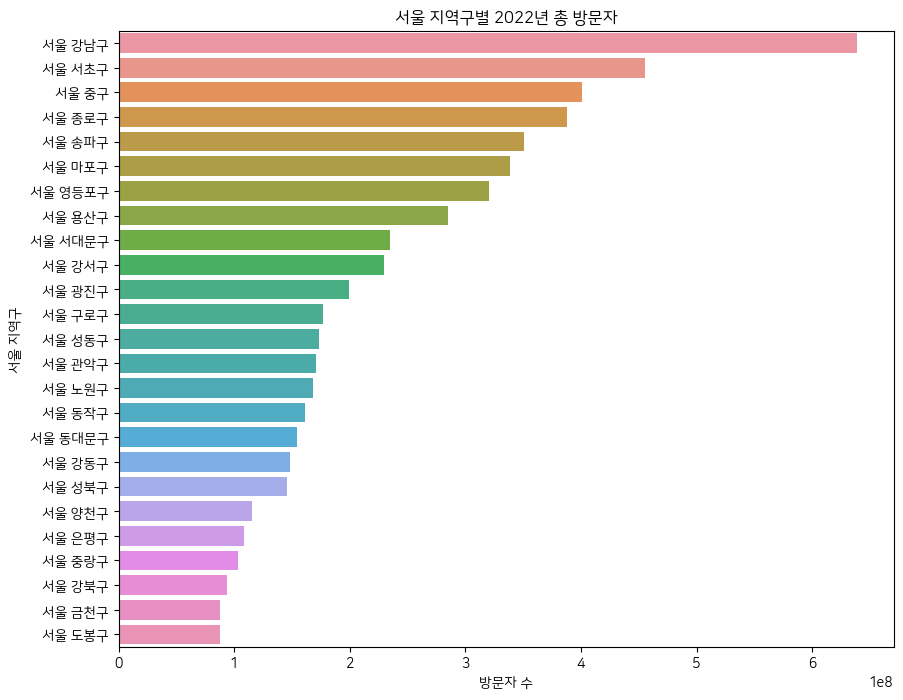

In [52]:
# 서울 지역구별 2022년 총 방문자 수 시각화
plt.figure(figsize=(10, 8))
sns.barplot(x=total_dist['연령별 총합'], y=total_dist['지역'])
plt.title('서울 지역구별 2022년 총 방문자')
plt.xlabel('방문자 수')
plt.ylabel('서울 지역구')

In [53]:
# 서울시 전체 방문자 수 구하기
total_dist['연령별 총합'].sum()

5738246805.0

In [54]:
# 연령대별 방문자 수 분포를 지도 시각화를 통해 표현하기
# swaplevel() 메서드를 이용하여 인덱스 순서를 바꿔주고 새롭게 정렬하기
dist_age2 = dist_age.swaplevel(0, 1, axis=0).sort_index()
dist_age2

연령별 총합  Unnamed: 0.2
방문자 연령 지역                                
노년     서울 강남구   106867410.0        1068.0
       서울 강동구    34075692.0        1068.0
       서울 강북구    21706062.0        1068.0
       서울 강서구    44723742.0        3372.0
       서울 관악구    28752150.0        3372.0
       서울 광진구    35960268.0        3372.0
       서울 구로구    36087432.0        5676.0
       서울 금천구    16858380.0        5676.0
       서울 노원구    37712898.0        5676.0
       서울 도봉구    23094972.0        7980.0
       서울 동대문구   36827802.0        7980.0
       서울 동작구    31477404.0        7980.0
       서울 마포구    49378500.0       10284.0
       서울 서대문구   40084746.0       10284.0
       서울 서초구    80824755.0       10284.0
       서울 성동구    32124846.0       12588.0
       서울 성북구    29281866.0       12588.0
       서울 송파구    66759951.0       12588.0
       서울 양천구    24489777.0       14892.0
       서울 영등포구   57010797.0       14892.0
       서울 용산구    48707601.0       14892.0
       서울 은평구    24851049.0       17196.0
       서울 종로구    78231477.0       17196.0
       서울 중구     68435280.0       17196.0
       서울 중랑구    24202824.0       19500.0
미성년자   서울 강남구    29785158.0        1212.0
       서울 강동구     7070838.0        1212.0
       서울 강북구     5194035.0        1212.0
       서울 강서구     9585048.0        3516.0
       서울 관악구     7420452.0        3516.0
       서울 광진구     9651087.0        3516.0
       서울 구로구     6950733.0        5820.0
       서울 금천구     2620620.0        5820.0
       서울 노원구    10324767.0        5820.0
       서울 도봉구     4324854.0        8124.0
       서울 동대문구    6857922.0        8124.0
       서울 동작구     6679881.0        8124.0
       서울 마포구    17178171.0       10428.0
       서울 서대문구   12192537.0       10428.0
       서울 서초구    18413304.0       10428.0
       서울 성동구     6873852.0       12732.0
       서울 성북구     9354027.0       12732.0
       서울 송파구    20431338.0       12732.0
       서울 양천구     6958338.0       15036.0
       서울 영등포구   11201439.0       15036.0
       서울 용산구    10348611.0       15036.0
       서울 은평구     5795085.0       17340.0
       서울 종로구    16046544.0       17340.0
       서울 중구     13980618.0       17340.0
       서울 중랑구     4485033.0       19644.0
중장년    서울 강남구   218191269.0        1116.0
       서울 강동구    56393124.0        1116.0
       서울 강북구    31986171.0        1116.0
       서울 강서구    85447500.0        3420.0
       서울 관악구    49772265.0        3420.0
       서울 광진구    66280845.0        3420.0
       서울 구로구    59444634.0        5724.0
       서울 금천구    33177357.0        5724.0
       서울 노원구    60735000.0        5724.0
       서울 도봉구    31276731.0        8028.0
       서울 동대문구   51420297.0        8028.0
       서울 동작구    52824012.0        8028.0
       서울 마포구   104326374.0       10332.0
       서울 서대문구   73307433.0       10332.0
       서울 서초구   160954896.0       10332.0
       서울 성동구    59645010.0       12636.0
       서울 성북구    48084555.0       12636.0
       서울 송파구   121112637.0       12636.0
       서울 양천구    43067853.0       14940.0
       서울 영등포구  109162893.0       14940.0
       서울 용산구    95850213.0       14940.0
       서울 은평구    37305588.0       17244.0
       서울 종로구   129615135.0       17244.0
       서울 중구    135591564.0       17244.0
       서울 중랑구    38365749.0       19548.0
청년     서울 강남구   283632690.0        1164.0
       서울 강동구    50682708.0        1164.0
       서울 강북구    35371926.0        1164.0
       서울 강서구    89701386.0        3468.0
       서울 관악구    84690759.0        3468.0
       서울 광진구    87360717.0        3468.0
       서울 구로구    73972443.0        5772.0
       서울 금천구    35516538.0        5772.0
       서울 노원구    59280189.0        5772.0
       서울 도봉구    28799118.0        8076.0
       서울 동대문구   59363535.0        8076.0
       서울 동작구    70492470.0        8076.0
       서울 마포구   168029904.0       10380.0
       서울 서대문구  108979551.0       10380.0
       서울 서초구   195645213.0       10380.0
       서울 성동구    75126045.0       12684.0
       서울 성북구    58664205.0       12684.0
       서울 송파구   142843260.0       12684.0
       서울 양천구    40551321.0    

In [55]:
# 지역구별 미성년자 총합
dist_age_3 = dist_age2.loc[('미성년자', slice(None))].sort_values("연령별 총합", ascending=False).reset_index()

In [56]:
# 지역구별 청년 총합
dist_age_4 = dist_age2.loc[('청년', slice(None))].sort_values("연령별 총합", ascending=False).reset_index()

In [57]:
# 지역구별 중장년 총합
dist_age_5 = dist_age2.loc[('중장년', slice(None))].sort_values("연령별 총합", ascending=False).reset_index()

In [58]:
# 지역구별 노년 총합
dist_age_6 = dist_age2.loc[('노년', slice(None))].sort_values("연령별 총합", ascending=False).reset_index()

In [59]:
# 지역에서 '서울' 빼고 새롭게 정의
dist_age_3["지역"] = dist_age_3["지역"].str.split().str[1]
dist_age_4["지역"] = dist_age_4["지역"].str.split().str[1]
dist_age_5["지역"] = dist_age_5["지역"].str.split().str[1]
dist_age_6["지역"] = dist_age_6["지역"].str.split().str[1]

In [60]:
# 미성년자 분포 지도 시각화
import folium

seoul_geojson = "http://raw.githubusercontent.com/southkorea/seoul-maps/master/kostat/2013/json/seoul_municipalities_geo_simple.json"
m = folium.Map(location=[37.55, 126.98], zoom_start=11, tiles='cartodbpositron')
# folium.GeoJson(seoul_geo, name = "지역구").add_to(m)
folium.Choropleth(
    geo_data=seoul_geojson,
    data=dist_age_3,
    columns=["지역", "연령별 총합"],
    fill_color='OrRd', # 색상 변경도 가능하다
    fill_opacity=0.7,
    line_opacity=0.5,
    key_on='feature.properties.name',
    legend_name="지역구별 방문객 수",
).add_to(m)
m

In [61]:
# 청년 분포 지도 시각화
import folium

seoul_geojson="http://raw.githubusercontent.com/southkorea/seoul-maps/master/kostat/2013/json/seoul_municipalities_geo_simple.json"

m = folium.Map(location=[37.55, 126.98], zoom_start=11, tiles='cartodbpositron')

# folium.GeoJson(seoul_geo, name = "지역구").add_to(m)
folium.Choropleth(
    geo_data=seoul_geojson,
    data=dist_age_4,
    columns=["지역", "연령별 총합"],
    fill_color='OrRd', # 색상 변경도 가능하다
    fill_opacity=0.7,
    line_opacity=0.5,
    key_on='feature.properties.name',
    legend_name="지역구별 방문객 수",
).add_to(m)
m

In [62]:
# 중장년 분포 지도 시각화
import folium

seoul_geojson="http://raw.githubusercontent.com/southkorea/seoul-maps/master/kostat/2013/json/seoul_municipalities_geo_simple.json"

m = folium.Map(location=[37.55, 126.98], zoom_start=11, tiles='cartodbpositron')

# folium.GeoJson(seoul_geo, name = "지역구").add_to(m)
folium.Choropleth(
    geo_data=seoul_geojson,
    data=dist_age_5,
    columns=["지역", "연령별 총합"],
    fill_color='OrRd', # 색상 변경도 가능하다
    fill_opacity=0.7,
    line_opacity=0.5,
    key_on='feature.properties.name',
    legend_name="지역구별 방문객 수",
).add_to(m)
m

In [63]:
# 노년 분포 지도 시각화
import folium

seoul_geojson="http://raw.githubusercontent.com/southkorea/seoul-maps/master/kostat/2013/json/seoul_municipalities_geo_simple.json"

m = folium.Map(location=[37.55, 126.98], zoom_start=11, tiles='cartodbpositron')

# folium.GeoJson(seoul_geo, name = "지역구").add_to(m)
folium.Choropleth(
    geo_data=seoul_geojson,
    data=dist_age_5,
    columns=["지역", "연령별 총합"],
    fill_color='OrRd', # 색상 변경도 가능하다
    fill_opacity=0.7,
    line_opacity=0.5,
    key_on='feature.properties.name',
    legend_name="지역구별 방문객 수",
).add_to(m)
m

In [64]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import folium

In [65]:
a = pd.read_csv('mini_rigion data/서울_인기관광지_전체_대형마트_교통시설_제외.csv')
a

,순위,관광지명,주소,분류,합산 검색 수
0,2,신세계백화점강남점,서울 서초구 신반포로 176-0,백화점,739194
1,3,현대백화점압구정본점,서울 강남구 압구정로 165-0,백화점,717042
2,4,코엑스,서울 강남구 영동대로 513-0,전시시설,697229
3,5,더현대서울,서울 영등포구 여의대로 108-0,백화점,654109
4,6,가락동농수산물도매시장,서울 송파구 양재대로 932-0,시장,625281
5,7,롯데몰김포공항점,서울 강서구 하늘길 38-0,쇼핑몰,486279
6,9,여의도한강공원,서울 영등포구 여의동로 330-0,도시공원,413857
7,10,롯데백화점본점,서울 중구 남대문로 81-0,백화점,412843
8,11,롯데월드몰,서울 송파구 올림픽로 300-0,쇼핑몰,391617
9,12,현대백화점목동점,서울 양천구 목동동로 257-0,백화점,390942


In [66]:
b = pd.read_csv('mini_rigion data/강남구_인기관광지_전체_대형마트_교통시설_제외.csv')
b

,순위,관광지명,주소,분류,합산 검색 수
0,1,현대백화점압구정본점,서울 강남구 압구정로 165-0,백화점,717042
1,2,코엑스,서울 강남구 영동대로 513-0,전시시설,697229
2,3,현대백화점무역센터점,서울 강남구 테헤란로 517-0,백화점,387838
3,4,갤러리아백화점명품관EAST,서울 강남구 압구정로 407-0,백화점,164618
4,5,인터컨티넨탈호텔서울코엑스,서울 강남구 봉은사로 524-0,호텔,163529
5,6,롯데백화점강남점,서울 강남구 도곡로 401-0,백화점,155185
6,7,그랜드인터컨티넨탈호텔서울파르나스,서울 강남구 테헤란로 521-0,호텔,151125
7,8,갤러리아백화점명품관WEST,서울 강남구 압구정로 343-0,백화점,116073
8,9,신사동가로수길,서울 강남구,테마공원,110000
9,10,SETEC,서울 강남구 남부순환로 3104-0,전시시설,94008


In [67]:
# 기존 순위 인덱스 컬럼 삭제
a = a.drop('순위', axis=1)
b = b.drop('순위', axis=1)

In [68]:
# 순위 인덱스 컬럼 추가
a['순위'] = range(1, len(a) + 1)
b['순위'] = range(1, len(b) + 1)

In [69]:
# 컬럼 순서 변경
a = a[['순위', '관광지명', '주소', '분류', '합산 검색 수']]
b = b[['순위', '관광지명', '주소', '분류', '합산 검색 수']]

In [70]:
a.head(10)

,순위,관광지명,주소,분류,합산 검색 수
0,1,신세계백화점강남점,서울 서초구 신반포로 176-0,백화점,739194
1,2,현대백화점압구정본점,서울 강남구 압구정로 165-0,백화점,717042
2,3,코엑스,서울 강남구 영동대로 513-0,전시시설,697229
3,4,더현대서울,서울 영등포구 여의대로 108-0,백화점,654109
4,5,가락동농수산물도매시장,서울 송파구 양재대로 932-0,시장,625281
5,6,롯데몰김포공항점,서울 강서구 하늘길 38-0,쇼핑몰,486279
6,7,여의도한강공원,서울 영등포구 여의동로 330-0,도시공원,413857
7,8,롯데백화점본점,서울 중구 남대문로 81-0,백화점,412843
8,9,롯데월드몰,서울 송파구 올림픽로 300-0,쇼핑몰,391617
9,10,현대백화점목동점,서울 양천구 목동동로 257-0,백화점,390942


In [71]:
b.head(10)

,순위,관광지명,주소,분류,합산 검색 수
0,1,현대백화점압구정본점,서울 강남구 압구정로 165-0,백화점,717042
1,2,코엑스,서울 강남구 영동대로 513-0,전시시설,697229
2,3,현대백화점무역센터점,서울 강남구 테헤란로 517-0,백화점,387838
3,4,갤러리아백화점명품관EAST,서울 강남구 압구정로 407-0,백화점,164618
4,5,인터컨티넨탈호텔서울코엑스,서울 강남구 봉은사로 524-0,호텔,163529
5,6,롯데백화점강남점,서울 강남구 도곡로 401-0,백화점,155185
6,7,그랜드인터컨티넨탈호텔서울파르나스,서울 강남구 테헤란로 521-0,호텔,151125
7,8,갤러리아백화점명품관WEST,서울 강남구 압구정로 343-0,백화점,116073
8,9,신사동가로수길,서울 강남구,테마공원,110000
9,10,SETEC,서울 강남구 남부순환로 3104-0,전시시설,94008


In [72]:
# 서울시 인기관광지 top10 시각화

from folium.features import DivIcon

seoul_geojson = "http://raw.githubusercontent.com/southkorea/seoul-maps/master/kostat/2013/json/seoul_municipalities_geo_simple.json"

# 위치와 해당 위치가 속한 구 정보 리스트
locations = [
    {'name': '신세계백화점강남점', 'loc': [37.4971756, 127.0264087]},
    {'name': '현대백화점압구정본점', 'loc': [37.527165, 127.047672]},
    {'name': '코엑스', 'loc': [37.5139, 127.0588]},
    {'name': '더현대서울', 'loc': [37.5112, 127.0617]},
    {'name': '가락동농수산물도매시장', 'loc': [37.492361, 127.118113]},
    {'name': '롯데몰김포공항점', 'loc': [37.5621541, 126.8011186]},
    {'name': '여의도한강공원', 'loc': [37.5244, 126.9372]},
    {'name': '롯데백화점 본점', 'loc': [37.5678174, 126.9809968]},
    {'name': '롯데월드몰', 'loc': [37.5115, 127.0985]},
    {'name': '현대백화점목동점', 'loc': [37.5263, 126.8754]}
]

# 지도 생성
m = folium.Map(location=[37.55, 126.98], zoom_start=11, tiles='cartodbpositron')

# 서울 구 경계 표시
folium.Choropleth(
    geo_data=seoul_geojson,
    fill_color='#22AA44',
    fill_opacity=0.4,
    line_opacity=1,
).add_to(m)

# 각 구 이름을 표시
geojson = folium.GeoJson(
    data=seoul_geojson,
    style_function = lambda feature: {
        'fillColor': '#FF5400',
        'color': 'black',
        'weight': 2,
        'fillOpacity': 0.5,
    },
    tooltip=folium.GeoJsonTooltip(fields=['name'], aliases=['구 이름'], sticky=True, opacity=0.7, direction='top')
).add_to(m)


# 위치에 마커와 툴팁 추가
for location in locations:
    name = location['name']
    loc = location['loc']
    tooltip = name  # 툴팁으로 이름 표시
    marker = folium.Marker(
        location=loc,
        tooltip=tooltip,  # 마우스 오버 툴팁으로 이름 표시
        #icon=folium.Icon(color='red', icon='info-sign')
        # DivIcon 을 사용
        # html 태그를 이용해서 text를 올릴 수 있음
        icon=DivIcon(
            # icon px 사이즈
            icon_size=(10, 10),
            # icon 좌 상단 위치 설정
            icon_anchor=(50, 50),

            # html 형식으로 text 추가
            # div 태그 안에 style 형식 추가
            html='<div\
                    style="\
                        font-size: 0.8rem;\
                        color: black;\
                        background-color:rgba(255, 255, 255, 0.5);\
                        width:110px;\
                        text-align:center;\
                        margin:0px;\
                    "><b>'
            # 글자 값 설정
            + name
            + '</b></div>',
        )
    ).add_to(m)
    
    marker = folium.Marker(
        location=loc,
        tooltip=tooltip,  # 마우스 오버 툴팁으로 이름 표시
        icon=folium.Icon(color='red', icon='info-sign')
    ).add_to(m)
    

    
# 지도 저장 및 출력
m.save('seoul_map.html')
m

In [73]:
# 강남구 인기관광지 top10 시각화

from folium.features import DivIcon

seoul_geojson = "http://raw.githubusercontent.com/southkorea/seoul-maps/master/kostat/2013/json/seoul_municipalities_geo_simple.json"

# 위치와 해당 위치가 속한 구 정보 리스트
locations = [
    {'name': '현대백화점압구정', 'loc': [37.527983, 127.047746]},
    {'name': '코엑스', 'loc': [ 37.5122, 127.0581]},
    {'name': '현대백화점무역센터점', 'loc': [37.5124, 127.0580]},
    {'name': '갤러리아백화점명품관EAST', 'loc': [37.5010222, 127.0264091]},
    {'name': '인터컨티넨탈호텔서울코엑스', 'loc': [37.513840, 127.058910]},
    {'name': '롯데백화점강남점', 'loc': [37.497942, 127.026186]},
    {'name': '그랜드인터컨티넨탈호텔서울파르나스', 'loc': [37.5078775, 127.0602825]},
    {'name': '갤러리아백화점명품관WEST ', 'loc': [37.5043174, 127.0262544]},
    {'name': '신사동가로수길', 'loc': [37.520983, 127.022642]},
  
]

# 지도 생성
m = folium.Map(location=[37.55, 126.98], zoom_start=11, tiles='cartodbpositron')

# 서울 구 경계 표시
folium.Choropleth(
    geo_data=seoul_geojson,
    fill_color='#22AA44',
    fill_opacity=0.4,
    line_opacity=1,
).add_to(m)

# 각 구 이름을 표시 
geojson = folium.GeoJson(
    data=seoul_geojson,
    style_function = lambda feature: {
        'fillColor': '#FF5400' if feature['properties']['name'] == '강남구' else '#66c2a5',
        'color': 'black',
        'weight': 2,
        'fillOpacity': 0.5,
    },
    tooltip=folium.GeoJsonTooltip(fields=['name'], aliases=['구 이름'], sticky=True, opacity=0.7, direction='top')
).add_to(m)


# 위치에 마커와 툴팁 추가
for location in locations:
    name = location['name']
    loc = location['loc']
    tooltip = name  # 툴팁으로 이름 표시
    marker = folium.Marker(
        location=loc,
        tooltip=tooltip,  # 마우스 오버 툴팁으로 이름 표시
        #icon=folium.Icon(color='red', icon='info-sign')
        # DivIcon 을 사용
        # html 태그를 이용해서 text를 올릴 수 있음
        icon=DivIcon(
            # icon px 사이즈
            icon_size=(10, 10),
            # icon 좌 상단 위치 설정
            icon_anchor=(50, 50),

            # html 형식으로 text 추가
            # div 태그 안에 style 형식 추가
            html='<div\
                    style="\
                        font-size: 0.8rem;\
                        color: black;\
                        background-color:rgba(255, 255, 255, 0.5);\
                        width:110px;\
                        text-align:center;\
                        margin:0px;\
                    "><b>'
            # 글자 값 설정
            + name
            + '</b></div>',
        )
    ).add_to(m)
    
    marker = folium.Marker(
        location=loc,
        tooltip=tooltip,  # 마우스 오버 툴팁으로 이름 표시
        icon=folium.Icon(color='red', icon='info-sign')
    ).add_to(m)
    

    
# 지도 저장 및 출력
m.save('seoul_gangnam_map.html')
m